<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

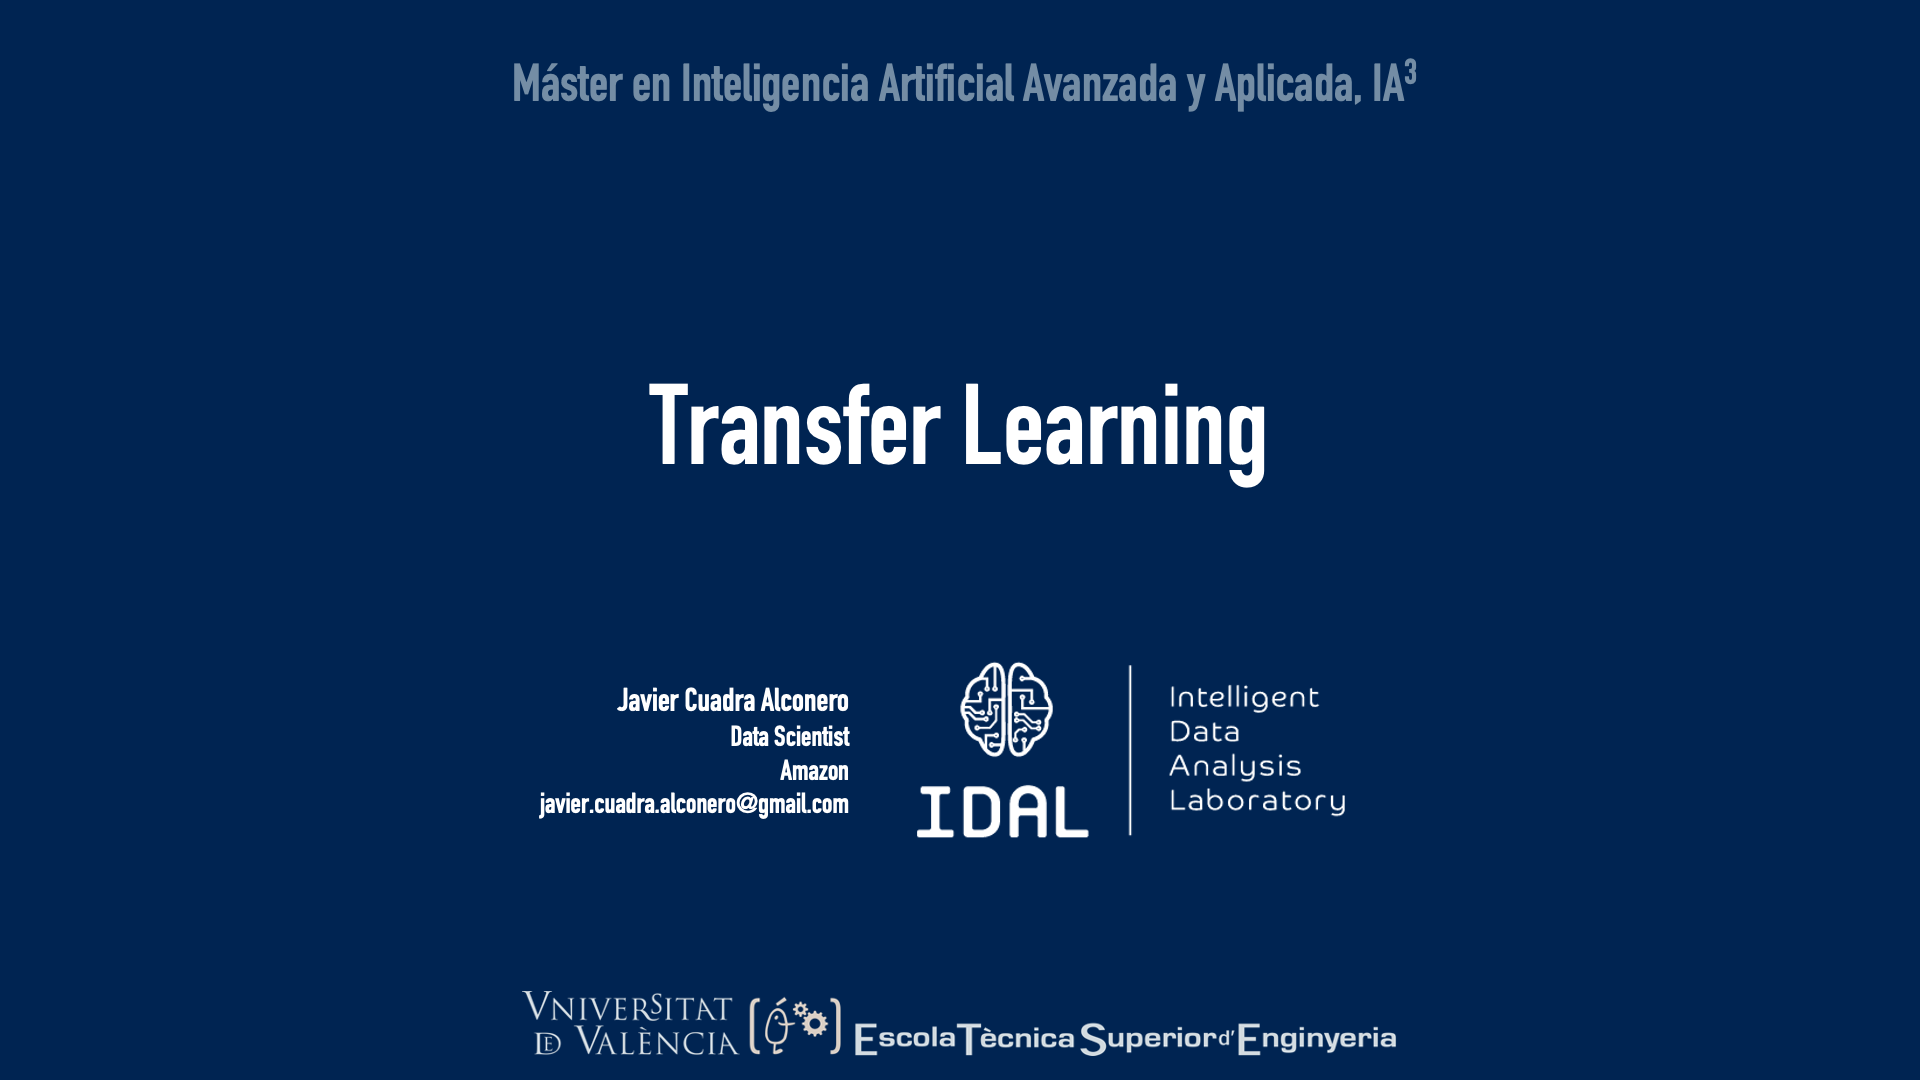

# Introducción a Transfer Learning

Transfer learning hace referencia a un conjunto de técnicas en aprendizaje máquina en las que se utiliza el "conocimiento" obtenido por un modelo para resolver una tarea concreta como punto de partida para un entrenamiento con el objetivo de resolver una tarea similar.

Este tipo de técnicas toma especial importancia en dominios como el procesado del lenguaje natural (NLP) y la visión por computador (Computer Vision) donde los modelos desarrollados son especialmente pesados y han sido entrenados sobre enormes conjuntos de datos.

El mundo del transfer learning es amplio y vasto, se trata de una técnica ampliamente usada en la industria por las ventajas que aporta a la hora de generar un nuevo producto, el cual, sin un modelo preentrenado, tendría unos costes en tiempo y recursos mucho mayores.

En este notebook vamos a aprender dos técnicas diferentes de transfer learning:

- Feature Extraction
- Fine Tuning

# Framework de Transfer Learning

Antes de comenzar a trabajar sobre las técnicas previamente nombradas, pasemos a enumerar los pasos que componen un problema de transfer learning:

- Selección de problema base y problema objetivo: Se selecciona una tarea de aprendizaje como base (problema base) que sea similar a aquella que vamos a resolver (problema objetivo). 

<center>

<br>

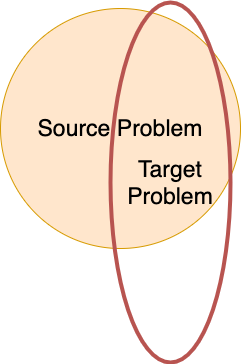

</center>

- Entrenamiento o selección de algoritmo base: Se entrena o selecciona un algoritmo que ha aprendido sobre un amplio conjunto de datos que comprende el problema base.

- Implantación o evaluación del modelo sobre el problema objetivo: Se aplica el algoritmo original al problema objetivo y se evalúa su rendimiento.

- Fine-tuning: Se reentrena el algoritmo en caso de ser necesario o se añaden nuevas capas para resolver el problema objetivo.

<br>

<center>

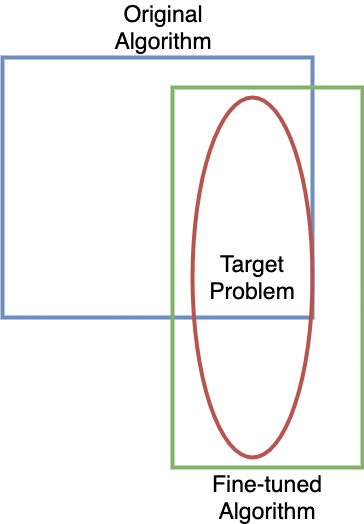

</center>

En la mayoría de escenarios es una idea recomendable partir de un algoritmo base entrenado sobre un conjunto de datos amplio y utilizando recursos que por norma general quedan fuera del alcance del proyecto. Sin embargo, se añade en este framework la opción de construír vosotros mismos un algoritmo, pues es una idea que se debe considerar siempre a la hora de resolver un problema específico para el que no dispongáis de demasiada información. Mirad siempre hacia atrás a otros modelos desarrollados como forma de acelerar vuestros desarrollos o resolver problemas con pequeños datasets.

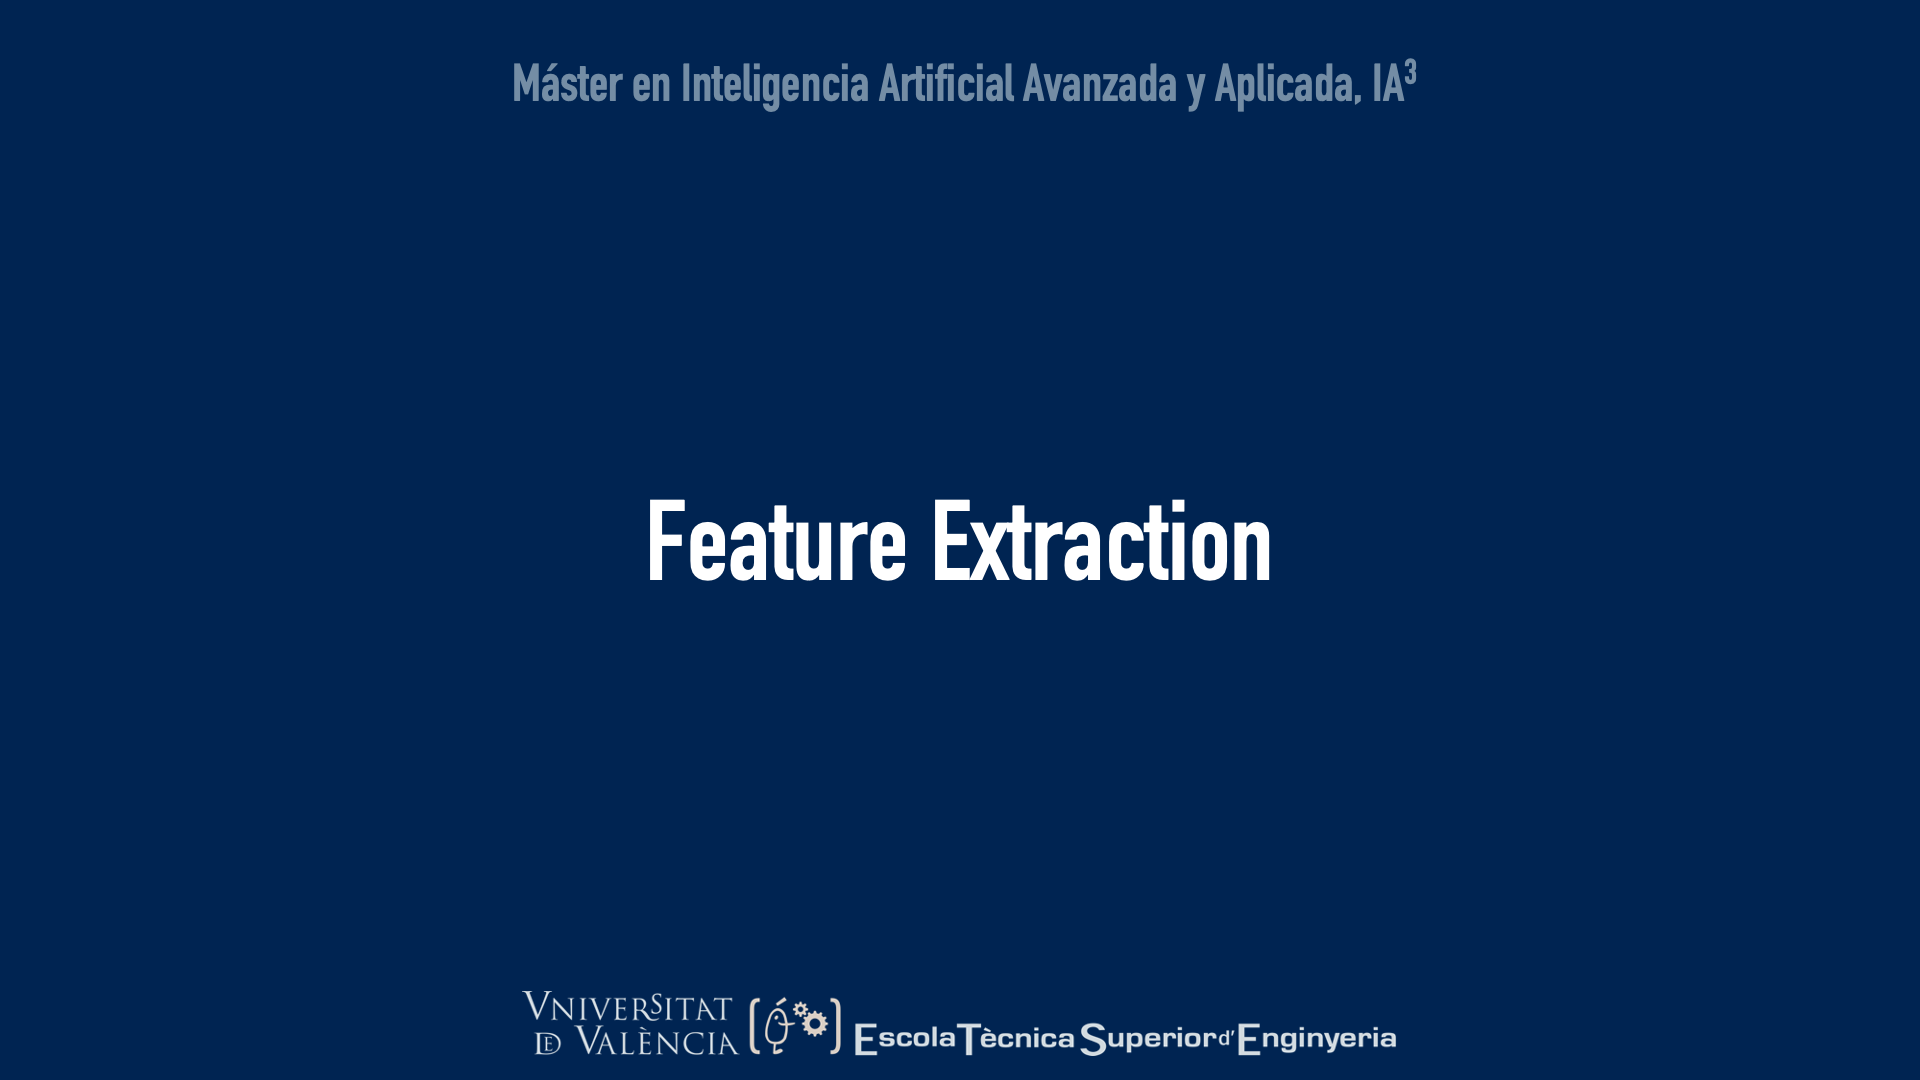

El modelo de feature extraction en transfer learning se basa en utilizar un modelo previamente entrenado para obtener nuevas características que servirán de entrada para entrenar un nuevo modelo.

Visualicemos una red de neuronas y las salidas de cada una de sus capas:

<center>

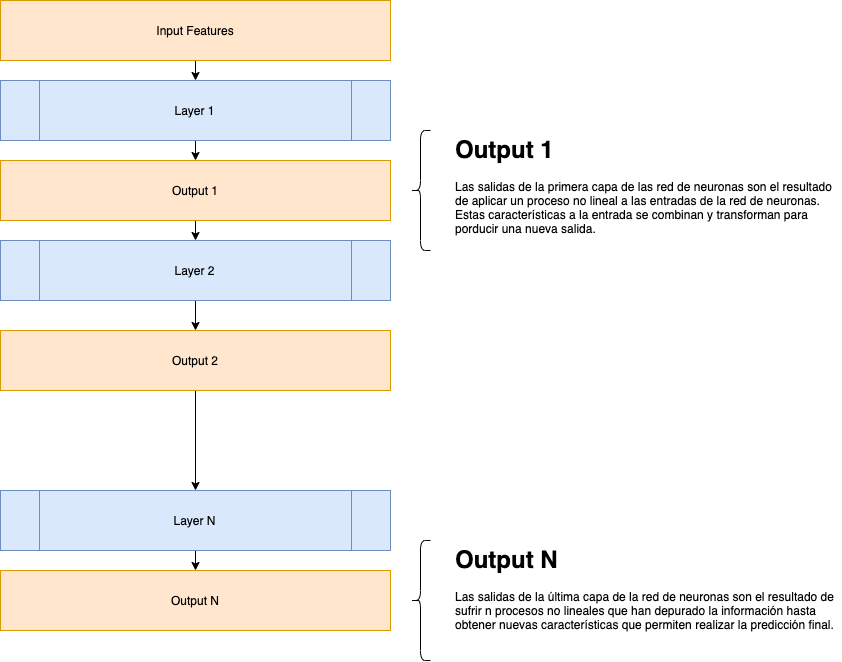

</center>

La idea del proceso de feature extraction es utilizar las salidas producidas en una de las capas de una red de neuronas como entrada para un nuevo modelo. Esta aproximación se basa justamente en las capacidades de una red de neuronas para generar información de mayor calidad tras atravesar sus diferentes capas.

Vamos a realizar algunos ejemplos utilizando la librería Keras para generar recursos con los que construir nuestros modelos utilizando transfer learning.

# Ejemplo 01

Construyamos un modelo de clasificación para el dataset Iris, guardemos el modelo e importémoslo de nuevo.

In [135]:
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [91]:
iris = sns.load_dataset("iris")
iris.head(2)
X=iris.iloc[:,:4]
Y=pd.get_dummies(iris.iloc[:,-1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
input = keras.Input(X.shape[1],)
layer_1 = keras.layers.Dense(10, activation="relu")(input)
layer_1_drop = keras.layers.Dropout(0.2)(layer_1)
layer_2 = keras.layers.Dense(5, activation="relu")(layer_1_drop)
output = keras.layers.Dense(3, activation="softmax")(layer_2)
model = keras.Model(inputs=input, outputs=output, name="Iris_classifier")
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy())

In [5]:
model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 3.4551
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 3.3004
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 3.0478
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 3.0853
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 3.0304
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.9255
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.6492
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.5075
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.5088
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 2.4617


In [7]:
model.save("iris_1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: iris_1/assets


In [8]:
loaded_model = keras.models.load_model("iris_1")

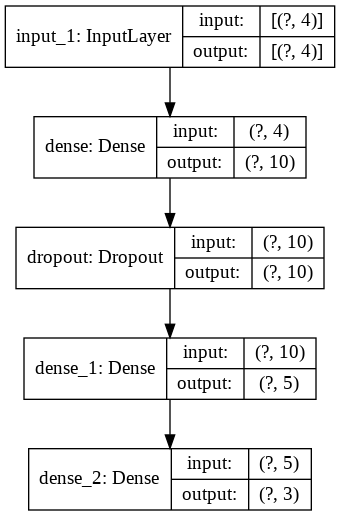

In [9]:
keras.utils.plot_model(loaded_model, show_shapes=True)

In [10]:
loaded_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 2.4423
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1774
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1413
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9704
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7231
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 2.0087
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7106
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6590
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6142
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5410
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4504
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3847
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

# Ejemplo 02

Extraer características de las diferentes capas del modelo previamente entrenado.

In [11]:
from tensorflow.keras import backend as K
import numpy as np

In [96]:
loaded_model.layers[1].weights[0].numpy()

array([[ 2.15458333e-01, -1.90841138e-01, -1.74671933e-01,
         2.46788505e-02,  8.80765319e-02, -3.28567684e-01,
         3.11647058e-01, -3.61752510e-01, -3.23441327e-01,
         5.46624064e-01],
       [ 1.76123425e-01, -4.74398464e-01,  1.61006805e-02,
         1.15298726e-01, -3.43507499e-01, -4.85705793e-01,
         3.68607581e-01, -5.43599129e-01, -7.19829798e-02,
         6.97997928e-01],
       [ 3.32250923e-01, -3.00186276e-01,  6.25374258e-01,
         2.89821714e-01, -1.02333426e-02, -5.70816457e-01,
         4.67647135e-01,  2.10822225e-01,  4.99637127e-01,
        -2.88332021e-03],
       [ 3.91642630e-01,  5.52490950e-01,  5.51479287e-04,
        -1.68570027e-01, -3.94449115e-01,  2.53682673e-01,
         4.27399606e-01, -3.78454953e-01, -6.01948798e-01,
        -4.67418671e-01]], dtype=float32)

In [89]:
# Como acceder a las capas de un modelo:

layers = loaded_model.layers #Lista que contiene las capas de un modelo

layer_01 = loaded_model.layers[1]
layer_01.weights #Atributo que contiene los pesos del modelo

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[ 2.15458333e-01, -1.90841138e-01, -1.74671933e-01,
          2.46788505e-02,  8.80765319e-02, -3.28567684e-01,
          3.11647058e-01, -3.61752510e-01, -3.23441327e-01,
          5.46624064e-01],
        [ 1.76123425e-01, -4.74398464e-01,  1.61006805e-02,
          1.15298726e-01, -3.43507499e-01, -4.85705793e-01,
          3.68607581e-01, -5.43599129e-01, -7.19829798e-02,
          6.97997928e-01],
        [ 3.32250923e-01, -3.00186276e-01,  6.25374258e-01,
          2.89821714e-01, -1.02333426e-02, -5.70816457e-01,
          4.67647135e-01,  2.10822225e-01,  4.99637127e-01,
         -2.88332021e-03],
        [ 3.91642630e-01,  5.52490950e-01,  5.51479287e-04,
         -1.68570027e-01, -3.94449115e-01,  2.53682673e-01,
          4.27399606e-01, -3.78454953e-01, -6.01948798e-01,
         -4.67418671e-01]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.05258511,  0.

Para realizar el siguiente ejercicio vamos a construir modelos basados en las capas intermedias de nuestro modelo anterior.

In [103]:
inp = loaded_model.layers[0]
outputs = [layer for layer in loaded_model.layers[1:-1]]   # all layer outputs
models = [keras.Model(inputs=inp.output, outputs=output.output) for output in outputs]    # evaluation functions

# Testing
layer_outs = [model.predict(X_train) for model in models]

In [104]:
layer_outs[0]

array([[4.653009  , 0.        , 2.0573168 , 1.4198308 , 0.        ,
        0.        , 6.3951383 , 0.        , 0.        , 4.713067  ],
       [4.770104  , 0.        , 2.4674208 , 1.6056452 , 0.        ,
        0.        , 6.5706573 , 0.        , 0.        , 4.648754  ],
       [3.6452074 , 0.        , 1.5403054 , 1.2218585 , 0.        ,
        0.        , 5.067958  , 0.        , 0.        , 4.4974337 ],
       [2.4365606 , 0.        , 0.03468469, 0.73738337, 0.        ,
        0.        , 3.6062953 , 0.        , 0.        , 5.3423724 ],
       [5.3628445 , 0.        , 2.939341  , 1.8910873 , 0.        ,
        0.        , 7.3543425 , 0.        , 0.        , 4.97559   ],
       [3.4751484 , 0.        , 1.2466955 , 1.0860095 , 0.        ,
        0.        , 4.839831  , 0.        , 0.        , 4.5140133 ],
       [4.897451  , 0.        , 2.3382895 , 1.5927372 , 0.        ,
        0.        , 6.7650123 , 0.        , 0.        , 4.96055   ],
       [4.8093395 , 0.        , 2.3838305

In [105]:
df_new_features = pd.DataFrame(layer_outs[0])
df_new_features.head(5)

,0,1,2,3,4,5,6,7,8,9
0,4.653009,0.0,2.057317,1.419831,0.0,0.0,6.395138,0.0,0.0,4.713067
1,4.770104,0.0,2.467421,1.605645,0.0,0.0,6.570657,0.0,0.0,4.648754
2,3.645207,0.0,1.540305,1.221859,0.0,0.0,5.067958,0.0,0.0,4.497434
3,2.436561,0.0,0.034685,0.737383,0.0,0.0,3.606295,0.0,0.0,5.342372
4,5.362844,0.0,2.939341,1.891087,0.0,0.0,7.354342,0.0,0.0,4.975590


# Ejercicio 01

Ahora que somos capaces de extraer las características generadas por una red de neuronas. Realizad el siguiente ejercicio:

- Descargad el dataset de titanic.
- Entrenad una red de neuronas de 2 capas con 5 neuronas por capa (capas de entrada y salida aparte). Durante 20 épocas con un batch size de 64.
- Entrenad un modelo de decision tree classifier utilizando las salidas de la primera capa, segunda capa y las entradas. 
- ¿Cuál de las tres entradas produce mejores resultados?
- Guardad el modelo en vuestra carpeta actual de colab

In [145]:
dataset = sns.load_dataset("titanic")

In [146]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [147]:
dataset.drop("deck", axis=1,inplace=True)
dataset.dropna(inplace=True)
dataset.adult_male = dataset.adult_male*1
dataset.alone = dataset["alone"].astype("int")
Y = pd.get_dummies(dataset.pop("alive"))
X = dataset
X = pd.get_dummies(X)
_ = X.pop("survived")

In [148]:
Y.head(2)

,no,yes
0,1,0
1,0,1


In [149]:
X.dtypes

pclass                       int64
age                        float64
sibsp                        int64
parch                        int64
fare                       float64
adult_male                   int64
alone                        int64
sex_female                   uint8
sex_male                     uint8
embarked_C                   uint8
embarked_Q                   uint8
embarked_S                   uint8
class_First                  uint8
class_Second                 uint8
class_Third                  uint8
who_child                    uint8
who_man                      uint8
who_woman                    uint8
embark_town_Cherbourg        uint8
embark_town_Queenstown       uint8
embark_town_Southampton      uint8
dtype: object

In [150]:
input_layer = keras.layers.Input((X.shape[1],))
dense_01 = keras.layers.Dense(5, activation="relu")(input_layer)
dense_02 = keras.layers.Dense(5, activation="relu")(dense_01)
classifier = keras.layers.Dense(2, activation="softmax")(dense_02)
model = keras.Model(inputs=input_layer, outputs=classifier, name="Titanic_classifier")
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy())

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
17/17 [==============================] - 0s 2ms/step - loss: 5.6339
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 4.1121
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 2.9934
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 2.0667
Epoch 5/20
17/17 [==============================] - 0s 2ms/step - loss: 1.2942
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 0.8240
Epoch 7/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 8/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6883
Epoch 9/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6832
Epoch 10/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6802
Epoch 11/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6769
Epoch 12/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6738
Epoch 13/20
17/17 [==============================

In [152]:
model.save("titanic_classifier")

INFO:tensorflow:Assets written to: titanic_classifier/assets


In [153]:
model.layers

In [154]:
inp = model.layers[0]
outputs = [layer for layer in model.layers[1:-1]]
models = [keras.Model(inputs=inp.output, outputs=output.output) for output in outputs]
features = [model.predict(X_train) for model in models]

In [163]:
features_01 = pd.DataFrame(features[0])
features_02 = pd.DataFrame(features[1])

In [164]:
features_01

,0,1,2,3,4
0,0.0,0.0,0.0,19.932386,23.890390
1,0.0,0.0,0.0,29.371973,33.720654
2,0.0,0.0,0.0,17.350065,21.069656
3,0.0,0.0,0.0,11.000822,13.918772
4,0.0,0.0,0.0,33.682983,33.578468
...,...,...,...,...,...
529,0.0,0.0,0.0,51.735046,52.419117
530,0.0,0.0,0.0,20.366964,21.636461
531,0.0,0.0,0.0,5.809595,3.472766
532,0.0,0.0,0.0,97.981339,94.055656


In [165]:
features_02.head(5)

,0,1,2,3,4
0,0.0,16.720293,22.911562,0.0,0.0
1,0.0,24.175880,32.520580,0.0,0.0
2,0.0,14.634840,20.180546,0.0,0.0
3,0.0,9.432121,13.298067,0.0,0.0
4,0.0,25.965349,33.305294,0.0,0.0


In [166]:
features_test = [model.predict(X_test) for model in models]

In [167]:
features_01_test = pd.DataFrame(features_test[0])
features_02_test = pd.DataFrame(features_test[1])

In [168]:
features_01_test

,0,1,2,3,4
0,0.0,0.0,0.0,23.770775,29.970194
1,0.0,0.0,0.0,10.948397,12.806574
2,0.0,0.0,0.0,96.947746,91.964760
3,0.0,0.0,0.0,16.148613,19.618889
4,0.0,0.0,0.0,27.211899,31.791866
...,...,...,...,...,...
173,0.0,0.0,0.0,24.330488,24.260042
174,0.0,0.0,0.0,8.432320,8.587681
175,0.0,0.0,0.0,17.956793,19.376585
176,0.0,0.0,0.0,70.037933,71.797379


In [169]:
tree_model = DecisionTreeClassifier()
tree_model.fit(features_01, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
tree_model.score(features_01_test, Y_test)

0.6460674157303371

# Conclusiones:

La aproximación de feature extraction utiliza un modelo previo como un extractor de características. Las diferentes capas de una red de neuronas combinan las entradas para generar diferentes salidas en cada iteración. El entrenamiento de la red permite generar estas características utilizando como guía una función de pérdida. Estas características en algunas ocasiones, pueden servir como mejores entradas para generar un nuevo algoritmo que la información en bruto del dataset original.

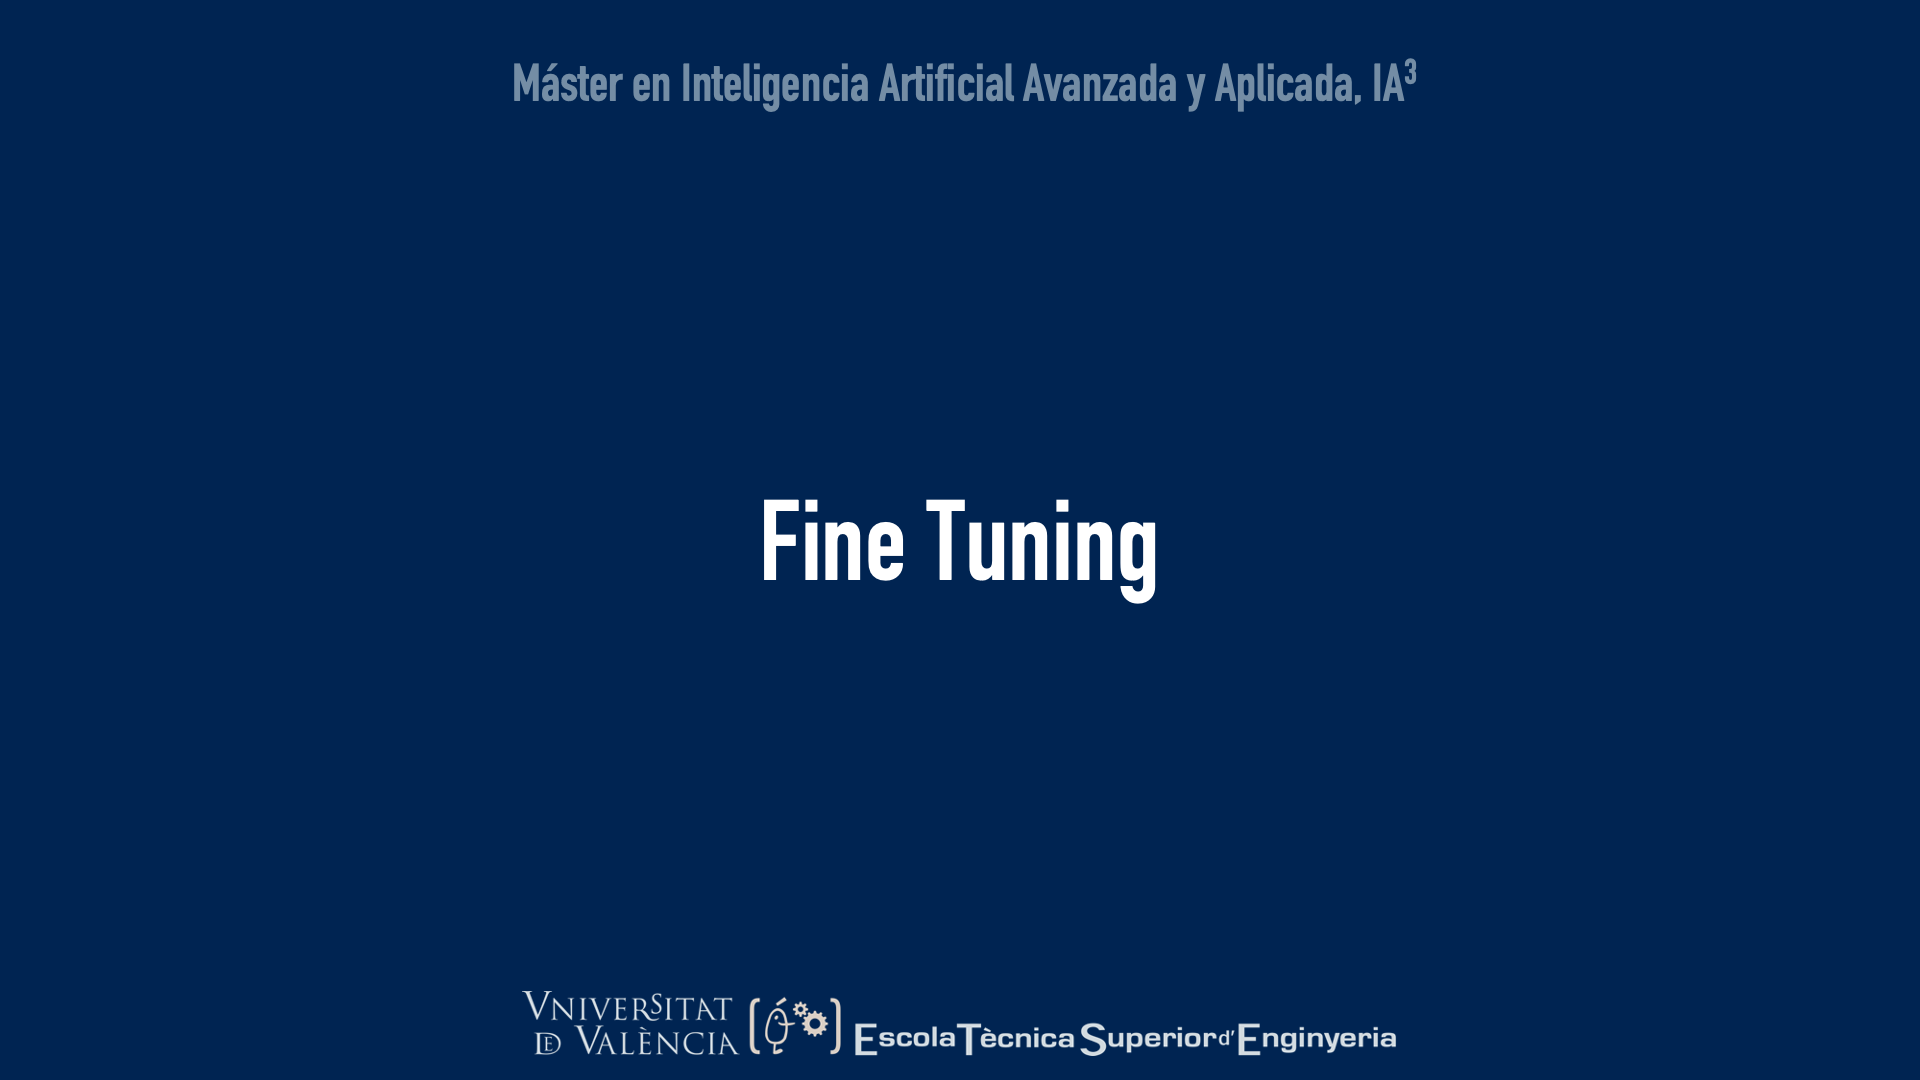

La aproximación de Fine Tuning plantea realizar un reentrenamiento sobre algunas de las capas del modelo construyendo una nueva capa de salida.

<br>

<center>

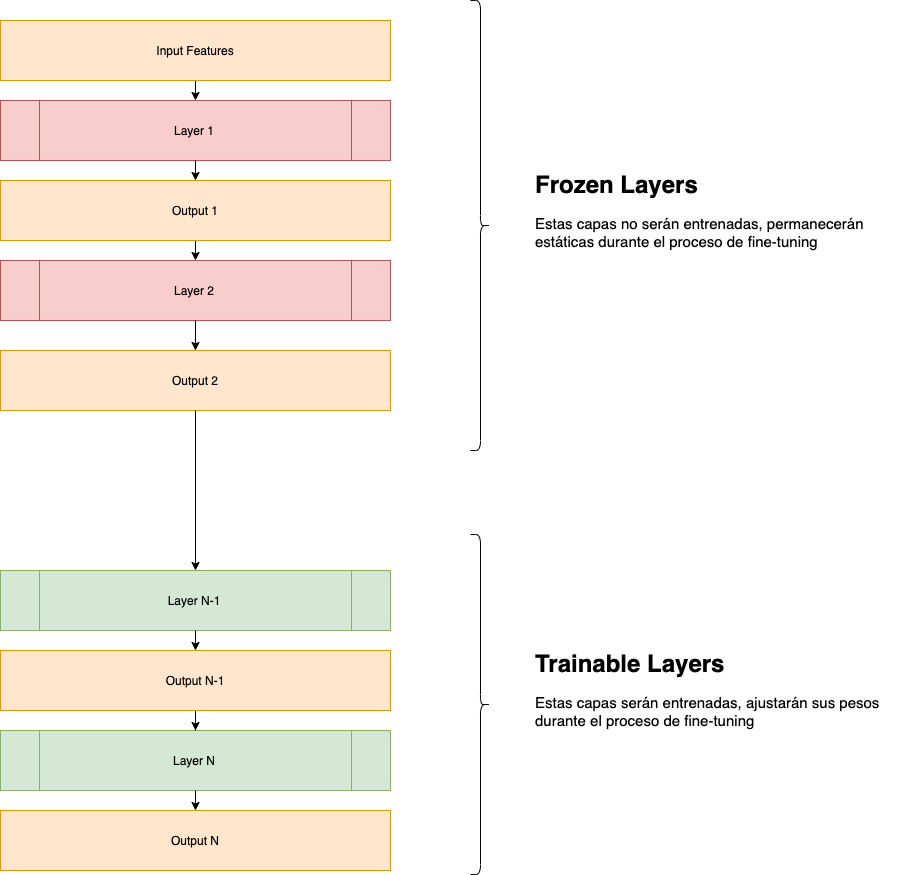

</center>

<br>

La idea principal tras esta aproximación se sustenta en que los modelos de aprendizaje profundo aprenden de forma general en las primeras capas del modelo y se especializan en sus últimas capas conforme se aproximan a la salida.



# Ejemplo 03

Carguemos el modelo de Iris previamente entrenado y congelemos algunas capas.

In [171]:
loaded_model = keras.models.load_model("iris_1")
loaded_model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [172]:
layers = loaded_model.layers
for layer in layers:
  print(layer.name, layer.trainable)

input_1 True
dense True
dropout True
dense_1 True
dense_2 True


Como se ve todas nuestras capas son entrenables en principio, en capas como las de input o dropout el parámetro es irrelevante dado que no existen pesos que congelar.

In [ ]:
loaded_model.layers[1].trainable = False
loaded_model.layers[3].trainable = False
loaded_model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 123
Trainable params: 18
Non-trainable params: 105
_________________________________________________________________


Al establecer el parámetro trainable como False, los parámetros de esas capas no se entrenarán.

# Ejercicio 01_02

Cargad el modelo del dataset de titanic anterior. Realizad un ejercicio de fine tuning para mejorar las salidas de vuestras capaz y volved a evaluar las salidas.


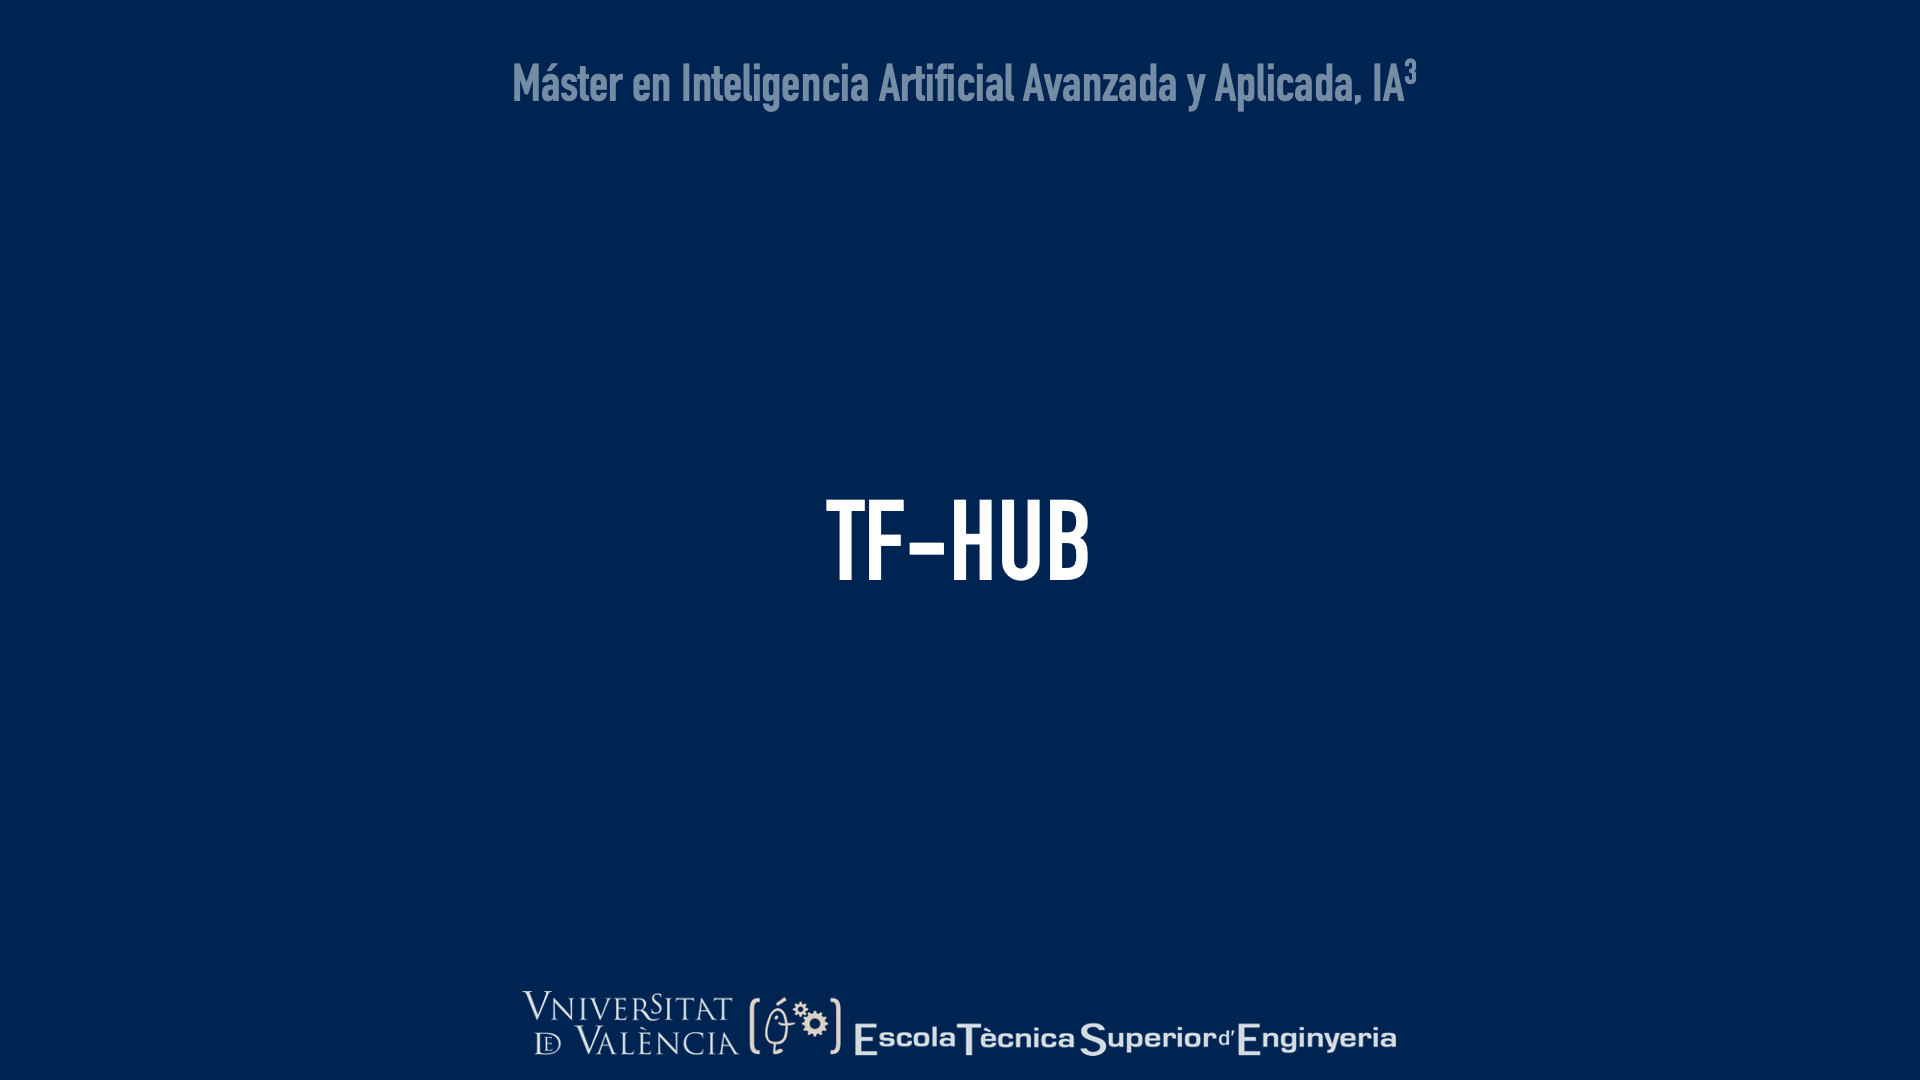

Tensorflow Hub es una librería que permite acceder de forma sencilla a modelos preentrenados con el objetivo de realizar ejercicios de transfer learning. 

In [173]:
import tensorflow_hub as hub

Utilizando este módulo es sencillo importar un modelo preentrenado como una capa de Keras. Es posible importar las capas como trainable o frozen utilizando el parámetro "trainable"

In [182]:
layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4", trainable=True)

In [183]:
input = keras.layers.Input(shape=(128,128,3))
mobile_net = layer(input)
model = keras.Model(inputs=input, outputs=mobile_net)
model.compile()

In [184]:
model.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1024)              3228864   
Total params: 3,228,864
Trainable params: 3,206,976
Non-trainable params: 21,888
_________________________________________________________________


A continuación vamos a realizar diversos ejercicios utilizando el módulo tensorflow hub y una gpu, para ello vamos a activar nuestra gpu en el entorno que estamos utilizando.

Para ello seleccionar runtime y la pestaña "Change runtime type". Una vez dentro del menú cambiad de none a GPU.

Para utilizar la gpu es necesario utilizar el comando tf.device() y seleccionar la gpu dentro del mismo. Podemos visualizar los dispositivos disponibles para el entrenamiento utilizando la siguiente sentencia.

In [187]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2125617707307468656, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16007371567483768964
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1487257019418690951
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13490663568226075685
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Dentro de los mismos dispositivos podemos seleccionar el que deseemos para entrenar, en nuestro caso utilizaremos: "/device:GPU:0"

# Ejemplo 04

Probad a entrenad durante 500 épocas el dataset de iris con gpu y cpu medid el tiempo añadiendo el magic %%time al comienzo de la celda.

¿Observáis algo extraño?

In [189]:
iris = sns.load_dataset("iris")
iris.head(2)
X=iris.iloc[:,:4]
Y=pd.get_dummies(iris.iloc[:,-1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
loaded_model = keras.models.load_model("iris_1")

In [190]:
%%time
with tf.device('/device:GPU:0'):
  loaded_model.fit(X_train, Y_train, epochs=500, batch_size=64)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 2.3971
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 2.3609
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 2.4687
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 2.1153
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 2.2562
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 2.2268
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 2.1157
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 2.0615
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 2.1011
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 1.8173
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 1.8208
Epoch 12/500
2/2 [==============================] - 0s 2ms/step - loss: 1.7445
Epoch 13/500
2/2 [==============================] - 0s 2ms/st

# Ejercicio 02

Realiza un entrenamiento de clasificación sobre el dataset mnist utilizando la gpu y la cpu de 500 épocas utilizando un batch_size de 32, 64 y 256 muestras.

Compara los tiempos de ejecución de ambos entrenamientos.


In [ ]:
dataset = pd.read_csv("sample_data/mnist_train_small.csv")

# Ejercicio 03

Utilizando una capa de feature extraction de TF-HUB construid un modelo de clasificación para el dataset de cats and dogs propuesto. Consultad los modelos disponibles en https://tfhub.dev/google/collections/image/1

Dado que vamos a cargar un dataset pesado compuesto por muchas imágenes es importante que utilicemos el sistema de preprocesamiento de imágenes de Keras https://keras.io/api/preprocessing/image/

Por lo tanto resolvamos el ejercicio en diferentes pasos construyendo un pipeline:

- Construyamos el dataset generator
- Importemos el modelo de feature extraction de TF-HUB
- Generemos las features para los sets de training y validación (en este ejemplo no realizaremos fine-tuning).
- Entrenemos un modelo de ML tradicional utilizando las features generadas
- Validemos el modelo sobre las features del set de validación.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2020-12-11 10:47:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.28.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   126MB/s    in 0.5s    

2020-12-11 10:47:56 (126 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Image Data Generator
generator = keras.preprocessing.image_dataset_from_directory("./cats_and_dogs_filtered/train", image_size=(128,128),
                                                             color_mode='rgb')

Found 2000 files belonging to 2 classes.


In [ ]:
# Load Model For TF Hub
keras_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4", trainable=False)

In [ ]:
input = keras.layers.Input(shape=(128,128,3))
inception_layer = keras_layer(input)
model = keras.Model(inputs=input, outputs=inception_layer)
model.compile()

# Ejercicio 04

Continuando con el ejercicio anterior, repitamos el proceso de entrenamiento con otro modelo de feature extraction, esta vez añadiendo una o varias capas densas al algoritmo seleccionado.

Comparad los resultados con el ejercicio anterior.

In [ ]:
# Escribid aquí vuestro modelo

# Ejercicio 05

Finalmente completemos el ejercicio realizando un entrenamiento esta vez añadiendo fine-tuning a la capa de feature extraction. Es decir, al importar vuestro modelo de tf_hub añadid trainable=True. Tras lo mismo conectad varias ccapas densas y realizar el entrenamiento del modelo.

Opcional: LLegados a este punto si habéis terminado podéis tratar de comprobar los diferentes rendimientos utilizando una GPU y una TPU.